In [1]:
import scvelo as scv
import numpy as np
import loompy
import scipy
import anndata
scv.__version__
import os
import scanpy as sc

In [2]:
import cellrank as cr

# import CellRank kernels and estimators
from cellrank.external.kernels import WOTKernel
from cellrank.tl.kernels import ConnectivityKernel
from cellrank.tl.estimators import GPCCA

In [3]:
print(sc.__version__)

1.8.0


In [4]:
import matplotlib.pyplot as plt
import scvelo as scv
import scanpy as sc
import cellrank as cr
import os
import numpy  as np
# import CellRank kernels and estimators
from cellrank.external.kernels import WOTKernel
from cellrank.tl.kernels import ConnectivityKernel
from cellrank.tl.estimators import GPCCA

In [5]:
import scanpy as sc
import pandas as pd
import time
import numpy as np

In [7]:
human_gast_raw = sc.read_csv('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/raw_elmir_blood.csv', delimiter=',')


human_gast_raw = human_gast_raw.transpose()

In [8]:
human_gast_raw

AnnData object with n_obs × n_vars = 143 × 36472

In [9]:
with open('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/cluster_blood.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
cluster_blood=np.array(lst,dtype=str)


In [11]:
cluster_blood[-1]

'Erythroblasts"\n'

In [12]:
cluster_blood[0]='MEP1'
cluster_blood[-1]='Erythroblasts'
human_gast_raw.obs['cluster_blood']=cluster_blood

In [26]:
with open('/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/color_blood.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
color_blood=np.array(lst,dtype=str)

In [29]:
color_blood[-1]='#B79F00'

In [30]:
color_blood[0]='#619CFF'

In [13]:
adata=human_gast_raw

In [14]:

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.tl.pca(adata, n_comps=30)
sc.pp.neighbors(adata, n_neighbors=5, use_rep='X_pca')

... storing 'color_blood' as categorical


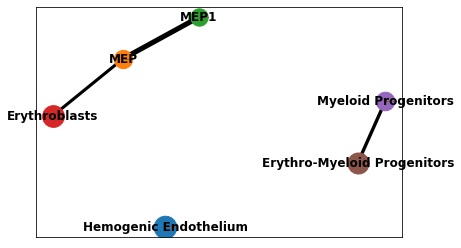

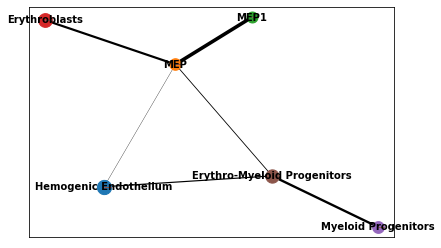

In [106]:


sc.pl.paga(adata,fontsize=12,node_size_scale=2.5,edge_width_scale=1,save="paga_embryo.pdf",threshold=0.4,color="color_blood")

sc.pl.paga(adata,save="paga_embryo.pdf",edge_width_scale=0.7,colors='color_blood'

)
#palette={'Erythro-Myeloid Progenitors':'#F8766D', 'Erythroblasts': '#B79F00','Hemogenic Endothelium': '#00BA38','MEP': '#00BFC4','MEP1': '#619CFF','Myeloid Progenitors':'#F564E3'}




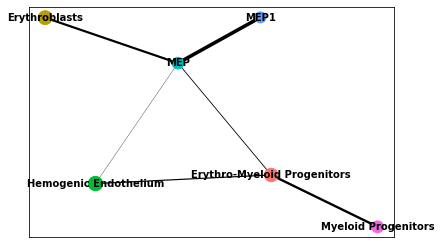

In [114]:
## These are the color I used in R
adata.uns['cluster_blood_colors']=["#F8766D","#B79F00","#00BA38","#00BFC4","#619CFF","#F564E3"]
sc.pl.paga(adata,save="gastrula_blood.pdf",edge_width_scale=0.7)

In [ ]:
##Stop here for the moment

In [3]:
## SKIP ALL THE PRE PROCESSING PART


In [61]:
scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')


In [85]:
###Skip all this part

In [86]:
## Day 0 rep 2


In [87]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day0')
adata_SIGAF8 = anndata.read('SIGAF8/adata.h5ad')
adata_SIGAF8.obs['run'] = '1_6'
adata_SIGAF8.obs['bcs'] = adata_SIGAF8.obs.index
adata_SIGAF8.obs.index = adata_SIGAF8.obs['bcs'] + '-' + adata_SIGAF8.obs['run']
adata_SIGAF8.var.index = adata_SIGAF8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_0_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_0_rep_2=np.array(lst,dtype=str)
barcode_day_0_rep_2[0]='AAACCCAAGCTCGGCT-1_6'
barcode_day_0_rep_2[-1]='TTTGTTGTCTCGCCTA-1_6'
final_SIGAF8 = adata_SIGAF8[adata_SIGAF8.obs.index.isin(barcode_day_0_rep_2),:]

In [88]:
final_SIGAF8

View of AnnData object with n_obs × n_vars = 9826 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [89]:
##Day 0 rep 1

In [90]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day0')
adata_SIGAH1 = anndata.read('SIGAH1/adata.h5ad')
adata_SIGAH1.obs['run'] = '1_8'
adata_SIGAH1.obs['bcs'] = adata_SIGAH1.obs.index
adata_SIGAH1.obs.index = adata_SIGAH1.obs['bcs'] + '-' + adata_SIGAH1.obs['run']
adata_SIGAH1.var.index = adata_SIGAH1.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_0_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_0_rep_1=np.array(lst,dtype=str)
barcode_day_0_rep_1[0]='AAACCCAAGAGATGCC-1_8'
barcode_day_0_rep_1[-1]='TTTGGTTTCCAGCCTT-1_8'
final_SIGAH1 = adata_SIGAH1[adata_SIGAH1.obs.index.isin(barcode_day_0_rep_1),:]

In [91]:
final_SIGAH1

View of AnnData object with n_obs × n_vars = 2157 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [92]:
##Day 2 rep 1

In [93]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day2')
adata_SIGAA9 = anndata.read('SIGAA9/adata.h5ad')
adata_SIGAA9.obs['run'] = '1_1_50'
adata_SIGAA9.obs['bcs'] = adata_SIGAA9.obs.index
adata_SIGAA9.obs.index = adata_SIGAA9.obs['bcs'] + '-' + adata_SIGAA9.obs['run']
adata_SIGAA9.var.index = adata_SIGAA9.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_2_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_2_rep_1=np.array(lst,dtype=str)
barcode_day_2_rep_1[0]='AAACCCAAGAGCAGTC-1_1_50'
barcode_day_2_rep_1[-1]='TTTGTTGTCACACGAT-1_1_50'
final_SIGAA9 = adata_SIGAA9[adata_SIGAA9.obs.index.isin(barcode_day_2_rep_1),:]

In [94]:
final_SIGAA9

View of AnnData object with n_obs × n_vars = 4293 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [95]:
##Day 2 rep 2

In [96]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day2')
adata_SIGAB9 = anndata.read('SIGAB9/adata.h5ad')
adata_SIGAB9.obs['run'] = '1_2_50'
adata_SIGAB9.obs['bcs'] = adata_SIGAB9.obs.index
adata_SIGAB9.obs.index = adata_SIGAB9.obs['bcs'] + '-' + adata_SIGAB9.obs['run']
adata_SIGAB9.var.index = adata_SIGAB9.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_2_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_2_rep_2=np.array(lst,dtype=str)
barcode_day_2_rep_2[0]='AAACCCAAGCATGAAT-1_2_50'
barcode_day_2_rep_2[-1]='TTTGTTGTCCTTATAC-1_2_50'
final_SIGAB9 = adata_SIGAB9[adata_SIGAB9.obs.index.isin(barcode_day_2_rep_2),:]

In [97]:
final_SIGAB9

View of AnnData object with n_obs × n_vars = 4297 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [98]:
## Day 3 rep 1

In [99]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day3')
adata_SIGAA8 = anndata.read('SIGAA8/adata.h5ad')
adata_SIGAA8.obs['run'] = '1_1'
adata_SIGAA8.obs['bcs'] = adata_SIGAA8.obs.index
adata_SIGAA8.obs.index = adata_SIGAA8.obs['bcs'] + '-' + adata_SIGAA8.obs['run']
adata_SIGAA8.var.index = adata_SIGAA8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_3_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_3_rep_1=np.array(lst,dtype=str)
barcode_day_3_rep_1[0]='AAACCCACACGCGTCA-1_1'
barcode_day_3_rep_1[-1]='TTTGTTGTCGGCCAAC-1_1'
final_SIGAA8= adata_SIGAA8[adata_SIGAA8.obs.index.isin(barcode_day_3_rep_1),:]

In [100]:
final_SIGAA8

View of AnnData object with n_obs × n_vars = 4204 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [101]:
## Day 3 rep 2

In [102]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day3')
adata_SIGAD8 = anndata.read('SIGAD8/adata.h5ad')
adata_SIGAD8.obs['run'] = '1_4'
adata_SIGAD8.obs['bcs'] = adata_SIGAD8.obs.index
adata_SIGAD8.obs.index = adata_SIGAD8.obs['bcs'] + '-' + adata_SIGAD8.obs['run']
adata_SIGAD8.var.index = adata_SIGAD8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_3_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_3_rep_2=np.array(lst,dtype=str)
barcode_day_3_rep_2[0]='AAACCCAAGCAAATGT-1_4'
barcode_day_3_rep_2[-1]='TTTGTTGGTCTCAAGT-1_4'
final_SIGAD8= adata_SIGAD8[adata_SIGAD8.obs.index.isin(barcode_day_3_rep_2),:]

In [103]:
final_SIGAD8

View of AnnData object with n_obs × n_vars = 3547 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [104]:
## Day 4 rep 1

In [105]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day4')
adata_SIGAB8 = anndata.read('SIGAB8/adata.h5ad')
adata_SIGAB8.obs['run'] = '1_2'
adata_SIGAB8.obs['bcs'] = adata_SIGAB8.obs.index
adata_SIGAB8.obs.index = adata_SIGAB8.obs['bcs'] + '-' + adata_SIGAB8.obs['run']
adata_SIGAB8.var.index = adata_SIGAB8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_4_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_4_rep_1=np.array(lst,dtype=str)
barcode_day_4_rep_1[0]='AAACCCAAGGTCCGAA-1_2'
barcode_day_4_rep_1[-1]='TTTGTTGTCCATTGGA-1_2'
final_SIGAB8= adata_SIGAB8[adata_SIGAB8.obs.index.isin(barcode_day_4_rep_1),:]

In [106]:
final_SIGAB8

View of AnnData object with n_obs × n_vars = 8449 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [107]:
## Day 4 rep 2

In [108]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day4')
adata_SIGAC8 = anndata.read('SIGAC8/adata.h5ad')
adata_SIGAC8.obs['run'] = '1_3'
adata_SIGAC8.obs['bcs'] = adata_SIGAC8.obs.index
adata_SIGAC8.obs.index = adata_SIGAC8.obs['bcs'] + '-' + adata_SIGAC8.obs['run']
adata_SIGAC8.var.index = adata_SIGAC8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_4_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_4_rep_2=np.array(lst,dtype=str)
barcode_day_4_rep_2[0]='AAACCCAAGCGATTCT-1_3'
barcode_day_4_rep_2[-1]='TTTGTTGTCTCTAAGG-1_3'
final_SIGAC8= adata_SIGAC8[adata_SIGAC8.obs.index.isin(barcode_day_4_rep_2),:]

In [109]:
final_SIGAC8

View of AnnData object with n_obs × n_vars = 10045 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [110]:
## Day 6 rep 1

In [111]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day6')
adata_SIGAC9 = anndata.read('SIGAC9/adata.h5ad')
adata_SIGAC9.obs['run'] = '1_3_50'
adata_SIGAC9.obs['bcs'] = adata_SIGAC9.obs.index
adata_SIGAC9.obs.index = adata_SIGAC9.obs['bcs'] + '-' + adata_SIGAC9.obs['run']
adata_SIGAC9.var.index = adata_SIGAC9.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_6_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_6_rep_1=np.array(lst,dtype=str)
barcode_day_6_rep_1[0]='AAACCCACAGGGACTA-1_3_50'
barcode_day_6_rep_1[-1]='TTTGTTGTCACTGAAC-1_3_50'
final_SIGAC9= adata_SIGAC9[adata_SIGAC9.obs.index.isin(barcode_day_6_rep_1),:]

In [112]:
final_SIGAC9

View of AnnData object with n_obs × n_vars = 5913 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [113]:
## Day 6 rep 2

In [114]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day6')
adata_SIGAD9 = anndata.read('SIGAD9/adata.h5ad')
adata_SIGAD9.obs['run'] = '1_4_50'
adata_SIGAD9.obs['bcs'] = adata_SIGAD9.obs.index
adata_SIGAD9.obs.index = adata_SIGAD9.obs['bcs'] + '-' + adata_SIGAD9.obs['run']
adata_SIGAD9.var.index = adata_SIGAD9.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_6_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_6_rep_2=np.array(lst,dtype=str)
barcode_day_6_rep_2[0]='AAACCCAAGACCAGCA-1_4_50'
barcode_day_6_rep_2[-1]='TTTGTTGTCGTGGGTC-1_4_50'
final_SIGAD9= adata_SIGAD9[adata_SIGAD9.obs.index.isin(barcode_day_6_rep_2),:]

In [115]:
final_SIGAD9

View of AnnData object with n_obs × n_vars = 6191 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [116]:
## Day 8 rep 1

In [117]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day8')
adata_SIGAG1 = anndata.read('SIGAG1/adata.h5ad')
adata_SIGAG1.obs['run'] = '1_7'
adata_SIGAG1.obs['bcs'] = adata_SIGAG1.obs.index
adata_SIGAG1.obs.index = adata_SIGAG1.obs['bcs'] + '-' + adata_SIGAG1.obs['run']
adata_SIGAG1.var.index = adata_SIGAG1.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_8_rep_1.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
barcode_day_8_rep_1=np.array(lst,dtype=str)
barcode_day_8_rep_1[0]='AAACCCAAGACCCTTA-1_7'
barcode_day_8_rep_1[-1]='TTTGTTGTCTTGAGCA-1_7'
final_SIGAG1= adata_SIGAG1[adata_SIGAG1.obs.index.isin(barcode_day_8_rep_1),:]

In [118]:
final_SIGAG1

View of AnnData object with n_obs × n_vars = 13622 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [119]:
## Day 8 rep 2

In [120]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/RNA_velocity/day8')
adata_SIGAE8 = anndata.read('SIGAE8/adata.h5ad')
adata_SIGAE8.obs['run'] = '1_5'
adata_SIGAE8.obs['bcs'] = adata_SIGAE8.obs.index
adata_SIGAE8.obs.index = adata_SIGAE8.obs['bcs'] + '-' + adata_SIGAE8.obs['run']
adata_SIGAE8.var.index = adata_SIGAE8.var.index.str.split('.').str[0]
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
with open('barcode_day_8_rep_2.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

barcode_day_8_rep_2=np.array(lst,dtype=str)
barcode_day_8_rep_2[0]='AAACCCACAACTCCAA-1_5'
barcode_day_8_rep_2[-1]='TTTGTTGTCTAGGCAT-1_5'
final_SIGAE8= adata_SIGAE8[adata_SIGAE8.obs.index.isin(barcode_day_8_rep_2),:]

In [121]:
final_SIGAE8

View of AnnData object with n_obs × n_vars = 9971 × 60675
    obs: 'run', 'bcs'
    layers: 'spliced', 'unspliced'

In [122]:
final_SIGAF8.write_loom('final__SIGAF8.loom')

In [123]:
final_SIGAH1.write_loom('final__SIGAH1.loom')

In [124]:
final_SIGAA9.write_loom('final__SIGAA9.loom')

In [125]:
final_SIGAB9.write_loom('final__SIGAB9.loom')

In [126]:
final_SIGAA8.write_loom('final__SIGAA8.loom')

In [127]:
final_SIGAD8.write_loom('final__SIGAD8.loom')

In [128]:
final_SIGAB8.write_loom('final__SIGAB8.loom')

In [129]:
final_SIGAC8.write_loom('final__SIGAC8.loom')

In [130]:
final_SIGAC9.write_loom('final__SIGAC9.loom')

In [131]:
final_SIGAD9.write_loom('final__SIGAD9.loom')

In [132]:
final_SIGAE8.write_loom('final__SIGAE8.loom')

In [133]:
final_SIGAG1.write_loom('final__SIGAG1.loom')

In [134]:
files = ["final__SIGAF8.loom","final__SIGAH1.loom","final__SIGAA9.loom",'final__SIGAB9.loom','final__SIGAA8.loom','final__SIGAD8.loom','final__SIGAB8.loom','final__SIGAC8.loom','final__SIGAC9.loom','final__SIGAD9.loom','final__SIGAE8.loom','final__SIGAG1.loom']
loompy.combine(files, 'all_days_organoids.loom')

In [ ]:
## END Pre processing

In [ ]:
## START HERE

In [ ]:
# cd /home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids (all input data are here)
#/home/ies/gabriele.lubatti/.linuxbrew/Cellar/python@3.7/3.7.9_2/bin/my_env/bin/python3
#srun -p normal_q -c 20  --mem=500G -t 10:00:00 --pty bash
#srun -p normal_q -c 20  --mem=100G -t 10:00:00 --pty bash

In [ ]:
##START PART on the server for RNA velocity + PAGA for all dataset (excluded bad quality cells and day at day0)

In [5]:
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis')
#/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids
/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids 
adata = scv.read("all_days_organoids.loom", sparse=True,cache=True)

In [ ]:
#For adding gene name
df = pd.DataFrame(adata_small.var)
df.to_csv('/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/gene_names.csv')
##Open R
##In R script markers_organoids.
geni_id_velocity=read.csv2("gene_names.csv",sep=",")
geni_id_velocity=geni_id_velocity$gene_id
setwd("/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis")
nomi_geni=read.table("human_gene_name.txt",sep="\t",header  = T)
row.names(nomi_geni)=as.vector(nomi_geni$Gene.stable.ID)
geni_id_final=geni_id_velocity[geni_id_velocity%in%row.names(nomi_geni)]
nomi_geni_vel=as.vector(nomi_geni[geni_id_final,]$Gene.name)
geni_id=geni_id_velocity
geni_id[geni_id_velocity%in%geni_id_final]=nomi_geni_vel
setwd("/Users/gabriele.lubatti/Desktop/Phd/Embryo_Organoids/R_analysis")
write.table(geni_id,file="geni_name_human_no_day_zero.txt",row.names = F,col.names = F)

In [12]:
adata.obs

,bcs,obs_names,run
0,AAACCCAAGCTCGGCT,AAACCCAAGCTCGGCT-1_6,1_6
1,AAACCCAAGGGTAGCT,AAACCCAAGGGTAGCT-1_6,1_6
2,AAACCCAAGGTGTGAC,AAACCCAAGGTGTGAC-1_6,1_6
3,AAACCCACACGCCAGT,AAACCCACACGCCAGT-1_6,1_6
4,AAACCCACACGCTGCA,AAACCCACACGCTGCA-1_6,1_6
...,...,...,...
82510,TTTGTTGCATAGAATG,TTTGTTGCATAGAATG-1_7,1_7
82511,TTTGTTGGTTACGGAG,TTTGTTGGTTACGGAG-1_7,1_7
82512,TTTGTTGTCACAGAGG,TTTGTTGTCACAGAGG-1_7,1_7
82513,TTTGTTGTCCTCCACA,TTTGTTGTCCTCCACA-1_7,1_7


In [52]:
with open('time_all.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('\n')
    

time_all=np.array(lst,dtype=str)
time_all=time_all[0:82515]
adata.obs['day']=time_all

with open('cluster_all_day_name_final.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    
cluster_all_day_name=np.array(lst,dtype=str)
cluster_all_day_name[0]='ANTERIOR PRIMITIVE STREAK'
cluster_all_day_name[-1]='CARDIAC PROGENITORS_CARDIAC MESODERM'
adata.obs['cluster_name']=cluster_all_day_name


##SKIP
with open('cluster_all_day_name_final_day.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

cluster_all_day_name_day=np.array(lst,dtype=str)
cluster_all_day_name_day[0]='ANTERIOR PRIMITIVE STREAK_0'
cluster_all_day_name_day[-1]='CARDIAC PROGENITORS_CARDIAC MESODERM_8'
adata.obs['cluster_name_day']=cluster_all_day_name_day

##STOP SKIP



with open('cluster_all_day_name_final_day_update_all.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

cluster_all_day_name_day=np.array(lst,dtype=str)
cluster_all_day_name_day[0]='PRIMITIVE STREAK1_0'
cluster_all_day_name_day[-1]='CARDIOMYOCYTES_8'
adata.obs['cluster_name_day_update']=cluster_all_day_name_day


with open('all_cluster_merged.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

cluster_all_day_name_day=np.array(lst,dtype=str)
cluster_all_day_name_day[0]='PRIMITIVE STREAK'
cluster_all_day_name_day[-1]='CARDIOMYOCYTES'
adata.obs['cluster_name_update_merge']=cluster_all_day_name_day






adata_small=adata[adata.obs["cluster_name_update_merge"]!="BAD QUALITY"]

with open('number_cluster_new_new.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

number_cluster=np.array(lst,dtype=str)
number_cluster[0]='1'
number_cluster[-1]='15'
adata_small.obs['number_cluster']=number_cluster




In [ ]:
adata_small=adata_small[adata_small.obs.day.isin(['2','3','4','6','8'])]

#SKIP
#with open('all_cluster_merged_final.txt','r') as fdata:
    #datastr=fdata.read()
    #lst = datastr.split('"\n"')
    

#cluster_all_day_name_day=np.array(lst,dtype=str)
#cluster_all_day_name_day[0]='MIXED MESODERM'
#cluster_all_day_name_day[-1]='CARDIAC MESODERM'
#adata_small.obs['cluster_name_merged']=cluster_all_day_name_day
#STOP


In [ ]:
#Only for Trajectories (we need to update the names with the last version)

In [ ]:
#Using annitation from slides 7-8-9-11 name:Lineage_fate_EOs_JN

#NMPs
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(['PRIMITIVE STREAK','PARAXIAL MESODERM','ECTODERM','SOMITIC MESODERM','MIXED MESODERM','NMP','NEURAL CREST','NEURAL TUBE','SPINAL CORD','SOMITES']),:]

adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]



In [ ]:

#NMPs
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(['ANTERIOR PRIMITIVE STREAK', 'POSTERIOR PRIMITIVE STREAK','NMP','PRIMITIVE STREAK/other cell type','PARAXIAL MESODERM','NEURONAL PROGENITORS','NEURAL CREST/NEURAL PROGENITORS',"LATERAL PLATE MESODERM","NEURAL CREST","EARLY MESODERM","SPINAL CORD","NON-NEURAL ECTODERM/AMLC","DORSAL NEURAL TUBE","VENTRAL NEURAL TUBE",'MIXED MESODERM','NMP_PGCLC_NEUROECTODERM','SOMITIC MESODERM','NMP_NEUROECTODERM','ADVANCED MESODERM','NEURAL CREST','SOMITIC MESODERM(POSTERIOR SOMITES)','SOMITIC MESODERM(ANTERIOR SOMITES)']),:]

adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]
#Somites                                                        
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(['ANTERIOR PRIMITIVE STREAK', 'POSTERIOR PRIMITIVE STREAK','NMP','PRIMITIVE STREAK/other cell type','PARAXIAL MESODERM','EMBRYONIC PATTERNING','MIXED MESODERM','NMP_PGCLC_NEUROECTODERM','SOMITIC MESODERM','NMP_NEUROECTODERM','ADVANCED MESODERM','SOMITIC MESODERM(POSTERIOR SOMITES)','SOMITIC MESODERM(ANTERIOR SOMITES)']),:]

adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]  
 #Neural crest                                                               
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(['ANTERIOR PRIMITIVE STREAK','POSTERIOR PRIMITIVE STREAK','NMP','PRIMITIVE STREAK/other cell type','NEURONAL PROGENITORS','NEURAL CREST/NEURAL PROGENITORS','NEURAL CREST','NMP_NEUROECTODERM','NMP_PGCLC_NEUROECTODERM','SPINAL CORD']),:]

adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])] 
                                                                
#Neuronal lineage
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(['ECTODERM','PRIMITIVE STREAK/other cell type','NEURONAL PROGENITORS','PRIMITIVE STREAK/other cell type','NEURAL CREST/NEURAL PROGENITORS','NMP_PGCLC_NEUROECTODERM','NMP_NEUROECTODERM ','NEURONS','NEUROECTODERM','NEURAL PLATE','NEURAL TUBE','SPINAL CORD','NEURONS','DORSAL NEURAL TUBE','VENTRAL NEURAL TUBE','SPINAL CORD','NEURAL CREST','NEURONS']),:]
adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]                                                                
                                                                
adata_small=adata_diff_small        
                                                                

In [ ]:
adata_diff_small=adata_small[adata_small.obs.cluster_name.isin(["PRIMITIVE STREAK","PARAXIAL MESODERM","ECTODERM","PRIMITIVE STREAK"  "PARAXIAL MESODERM" "ECTODERM"])]
adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]


In [ ]:
#NMPs
adata_diff_small=adata_small[adata_small.obs.cluster_name_day_update.isin(["PRIMITIVE STREAK1_0","PRIMITIVE STREAK2_0","PRIMITIVE STREAK3_0","PRIMITIVE STREAK_2","NEURONAL PROGENITORS_2","PARAXIAL MESODERM_2","PRIMITIVE STREAK_3","PARAXIAL MESODERM_3","NEURAL PROGENITORS_3","NEUROPROGENITORS_4","NEUROECTODERM_4","SOMITIC MESODERM_4","MIXED MESODERM_4","PARAXIAL MESODERM1_4","PARAXIAL MESODERM2_4","NEURAL CREST_4","NEURAL CREST1_6","NEURAL CREST2_6","NEURAL TUBE_6","SPINAL CORD_6","SOMITES1_8","SOMITES2_8","NEURAL CREST_8","NEURAL TUBE1_8","SPINAL CORD_8","NEURAL TUBE2_8"]),:]


adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]

#adata_diff_small=adata_small[adata_small.obs.cluster_name_day_update.isin(["NEURAL TUBE2_8"]),:]



#Somites                                                        
adata_diff_small=adata_small[adata_small.obs.cluster_name_day_update.isin(["PRIMITIVE STREAK1_0","PRIMITIVE STREAK2_0","PRIMITIVE STREAK3_0","PRIMITIVE STREAK_2","PARAXIAL MESODERM_2","PRIMITIVE STREAK_3","PARAXIAL MESODERM_3","PARAXIAL MESODERM1_4","PARAXIAL MESODERM2_4","SOMITIC MESODERM_4" ,"MIXED MESODERM_4","SOMITES1_8","SOMITES2_8"]),:]

adata_diff_small=adata_diff_small[adata_diff_small.obs.day.isin(['2','3','4','6','8'])]



In [ ]:
#Only for All dataset

In [ ]:





sc.pp.normalize_total(adata_small, target_sum=1e4)
sc.pp.log1p(adata_small)

In [ ]:
#For both all dataset and trajectories

In [ ]:
sc.pp.highly_variable_genes(adata_small, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'day')
#var_genes_batch = adata_small.var.highly_variable_nbatches > 1
var_select = adata_small.var.highly_variable_nbatches > 1
var_genes = var_select.index[var_select]
batches = adata_small.obs['day'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_small[adata_small.obs['day'] == batch,]

alldata  
import scanorama



alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_select]


adatas = list(alldata2.values())

##BELOW ONLY FOR RNA VELOCITY
scanorama.integrate_scanpy(adatas, dimred = 50)
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)
print(all_s.shape)


adata_small.obsm["Scanorama"] = all_s

##BELOW ONLY FOR NON RNA VELOCITY
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)
adata_corrected = corrected[0].concatenate(corrected[1], corrected[2],corrected[3],corrected[4])

##FROM HERE EQUAL FOR BOTH method 
#change adata_small with adata_corrected for the NON RNA VELOCITY VERSION
#adata_small=adata_corrected
#sc.pp.neighbors(adata_small, n_pcs =50, use_rep = "Scanorama")
sc.pp.neighbors(adata_small, n_pcs =50, use_rep = "X_scanorama")
#cluster_name_update_merge
sc.tl.paga(adata_small,groups='cluster_name_day_update')
sc.tl.paga(adata_small,groups='cluster_name_update_merge')
#sc.pl.paga(adata_small,color='cluster_name_day_update',fontsize=2,node_size_scale=0.1,edge_width_scale=0.01,save="paga_embryo.pdf",threshold=1)
#sc.pl.paga(adata_small,color='cluster_name_merged',fontsize=2,node_size_scale=0.1,edge_width_scale=0.01,save="paga_embryo.pdf",threshold=0.6)


with open('number_cluster.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

cluster_all_day_name_day=np.array(lst,dtype=str)
cluster_all_day_name_day[0]='11'
cluster_all_day_name_day[-1]='4'
adata_small.obs['cluster_number']=cluster_all_day_name_day

sc.tl.paga(adata_small,groups='cluster_number')

#color option (not sure)
sc.pl.paga(adata_small,fontsize=10,node_size_scale=1.5,edge_width_scale=0.05,save="paga_embryo.pdf",threshold=0.4,color={'1':'#808080', '2': '#6495ED','3': '#00BFFF','4': '#0000FF','5': '#87CEFA','6': '#4169E1','7': '#87CEEB','8':'#B22222','9':'#DC143C','10':'#FF0000','11':'#FF6347','12':'#FF7F50','13':'#CD5C5C','14':'#F08080','15':'#E9967A','16':'#FA8072','17':'#FFA07A','18':'#FFFF00','19':'#F0E68C','20':'#FFE4C4','21':'#2E8B57','22':'#00FF00','23':'#CD853F','24':'#EE82EE'})



adata_small.uns['number_cluster_colors']=["#808080","#6495ED","#00BFFF","#0000FF","#87CEFA","#4169E1","#87CEEB","#B22222","#DC143C","#FF0000","#FF6347","#FF7F50","#CD5C5C","#F08080","#E9967A","#FA8072","#FFA07A","#FFFF00","#F0E68C","#FFE4C4","#2E8B57","#00FF00","#CD853F","#EE82EE"]

sc.tl.paga(adata_small,groups='number_cluster')
sc.pl.paga(adata_small,fontsize=12,node_size_scale=2.5,edge_width_scale=0.05,save="paga_embryo.pdf",threshold=0.4,color="number_cluster")

sc.tl.paga(adata_small,groups='cluster_name_update_merge')
sc.pl.paga(adata_small,fontsize=3,node_size_scale=1.5,edge_width_scale=0.05,save="paga_embryo.pdf",threshold=0.4,color="cluster_name_update_merge")

adata_small.uns['cluster_name_update_merge_colors']=["#808080","#6495ED","#00BFFF","#0000FF","#87CEFA","#4169E1","#87CEEB","#B22222","#DC143C","#FF0000","#FF6347","#FF7F50","#CD5C5C","#F08080","#E9967A","#FA8072","#FFA07A","#FFFF00","#F0E68C","#FFE4C4","#2E8B57","#00FF00","#CD853F","#EE82EE"]


sc.tl.umap(adata_small, init_pos='paga')
sc.tl.umap(adata_small, init_pos='paga')

sc.pl.umap(adata_small, color="number_cluster", title="Scanorama umap", show=True,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=6,palette={'1':'#808080', '2': '#6495ED','3': '#00BFFF','4': '#0000FF','5': '#87CEFA','6': '#4169E1','7': '#87CEEB','8':'#B22222','9':'#DC143C','10':'#FF0000','11':'#FF6347','12':'#FF7F50','13':'#CD5C5C','14':'#F08080','15':'#E9967A','16':'#FA8072','17':'#FFA07A','18':'#FFFF00','19':'#F0E68C','20':'#FFE4C4','21':'#2E8B57','22':'#00FF00','23':'#CD853F','24':'#EE82EE','25':'#BC8F8F'})


#palette dictionary palette={'0':'#F8766D', '1': '#A3A500','2': '#00BF7D','3': '#00B0F6','4': '#E76BF3'}

sc.pl.umap(adata_small, color="number_cluster", title="Scanorama umap", show=True,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=9,palette={'1':'#808080', '2': '#6495ED','3': '#00BFFF','4': '#0000FF','5': '#87CEFA','6': '#4169E1','7': '#87CEEB','8':'#B22222','9':'#DC143C','10':'#FF0000','11':'#FF6347','12':'#FF7F50','13':'#CD5C5C','14':'#F08080','15':'#E9967A','16':'#FA8072','17':'#FFA07A','18':'#FFFF00','19':'#F0E68C','20':'#FFE4C4','21':'#2E8B57','22':'#00FF00','23':'#CD853F','24':'#EE82EE','25':'#BC8F8F'})



sc.pl.umap(adata_small, color="cluster_number", title="Scanorama umap", show=True,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=7,palette="")

sc.pl.umap(adata_small, color="day", title="Scanorama umap", show=False,components=[1,2],save='umap_velocity.pdf',legend_fontsize=14)

#colors for umap for day without 0['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#adata_small.uns['day_colors']

sc.pl.umap(adata_small, color="cluster_name_update_merge", title="Scanorama umap", show=True,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=1)




#sc.pl.umap(adata_small, color="cluster_name_merged", title="Scanorama umap", show=False,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=2)
#sc.pl.umap(adata_small, color="cluster_name_day_update", title="Scanorama umap", show=False,components=[1,2],save='umap_velocity.pdf',legend_loc='on data',legend_fontsize=2)
#sc.pl.umap(adata_small, color="day", title="Scanorama umap", show=False,components=[1,2],save='umap_velocity.pdf',legend_fontsize=5)



sc.tl.draw_graph(adata_corrected,init_pos='paga')
sc.pl.draw_graph(adata_corrected,color="cluster_name_day_update",legend_loc="on data",legend_fontsize=2,save="force_embryo.pdf")
adata_corrected.uns['iroot'] = np.flatnonzero(adata_corrected.obs['day']  == '2')[0]
#sc.tl.dpt(adata_corrected)
#sc.pl.draw_graph(adata_corrected, color=[ 'dpt_pseudotime'], legend_loc='on data',save="force_embryo.pdf")
#sc.pl.paga(adata_corrected,color='dpt_pseudotime',fontsize=2,node_size_scale=0.1,edge_width_scale=0.01,save="paga_embryo.pdf",threshold=1)
#sc.pl.paga(adata_corrected,color='day',fontsize=2,node_size_scale=0.1,edge_width_scale=0.01,save="paga_embryo.pdf",threshold=1)
adata_small.write_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_no_day_zero_small.h5ad")


##BELOW ONLY FOR RNA VELOCITY
adata_small_small = adata_small[:, var_select]
adata_small_small.write_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_nmp_no_velocity.h5ad")

#Similarly
#adata_neural_crest_no_velocity.h5ad
#adata_nmp_no_velocity.h5ad
#adata_somites_no_velocity.h5ad

In [ ]:
adata_small=read_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_no_day_zero_small.h5ad")



In [ ]:
##Below only for RNA velocity analysis

In [ ]:
scv.pp.moments(adata_small_small, n_pcs=30, n_neighbors=30)

In [ ]:
scv.tl.recover_dynamics(adata_small_small,n_jobs=8)
scv.tl.velocity(adata_small_small, mode='dynamical')
scv.tl.velocity_graph(adata_small_small)
#adata_small_small.write_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_velocity_small.h5ad")
#adata_small_small.write_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_neurons_velocity.h5ad")
#Similarly for other trajectories
#adata_neural_crest_velocity.h5ad
#adata_nmp_velocity.h5ad
#adata_somites_velocity.h5ad

#adata_velocity_small: velocity analysis for all the dataset

In [ ]:
##Plot Paga and UMAP with RNA velocity

In [ ]:
scv.pl.velocity_embedding_stream(
    adata_small_small,color='cluster_name_day', basis="umap", legend_fontsize=4, title="", smooth=0.8, min_mass=2,save="all_rna_velocity_embryo.png"
)

adata_small_small.uns['neighbors']['distances'] = adata_small_small.obsp['distances']
adata_small_small.uns['neighbors']['connectivities'] = adata_small_small.obsp['connectivities']

scv.tl.paga(adata_small_small, groups='cluster_name_day')
df = scv.get_df(adata_small_small, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')
scv.pl.paga(adata_small_small, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=0.5,save="paga_plot_all.png",legend_loc='on data')

scv.pl.paga(adata_small_small, size=50, alpha=0,
            min_edge_width=0.1,max_edge_width=0.7, node_size_scale=0.5,save="paga_plot_all.pdf",legend_loc='right margin',fontsize='2',arrowsize=10)



scv.pl.paga(adata_small_small,basis='umap', size=50, alpha=0,
            min_edge_width=0.1,max_edge_width=0.7, node_size_scale=0.5,save="paga_plot_all.pdf",legend_loc='on data',fontsize='2',arrowsize=10)


scv.pl.paga(adata_small_small,size=5, alpha=0.1,
            min_edge_width=0.5, node_size_scale=0.5,save="paga_plot_all_new.png",legend_loc='on data',legend_fontsize=1,threshold=0.5)

In [ ]:
#Stop RNA velocity 

In [ ]:
##UMAP and PAGA for all cells with new label annotation

In [ ]:
#Start cell rank on server for all cells without low quality cells and day 0

In [ ]:
#adata_corrected.write_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_no_day_zero_small.h5ad")

adata_corrected=sc.read_h5ad("/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/adata_no_day_zero_small.h5ad")

In [ ]:
with open('geni_name_human_no_day_zero.txt','r') as fdata:
    datastr=fdata.read()
    lst = datastr.split('"\n"')
    

nomi_geni=np.array(lst,dtype=str)
#nomi_geni[0]='Ifi202b'
#nomi_geni[-1]='Gm50460'
#adata.var_names=nomi_geni
adata=adata_corrected
adata.var_names
nomi_geni[0]='ZBTB18'
nomi_geni[-1]='EPHA2'
adata.var_names=nomi_geni

In [ ]:
wk = WOTKernel(adata, time_key="day")
wk.compute_initial_growth_rates(organism="human", key_added="growth_rate_init")
scv.pl.scatter(
    adata, c="growth_rate_init", legend_loc="right", basis="X_umap", s=10
)
wk.compute_transition_matrix(
    growth_iters=3, growth_rate_key="growth_rate_init", last_time_point="connectivities")
#Restart from here
wk.plot_random_walks(
    n_sims=300,
    max_iter=200,
    start_ixs={"day": 0.0},
    basis="X_umap",
    c="day",
    legend_loc="none",
    linealpha=0.5,
    dpi=150,
    save='/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/random_walk_wt.png'
)
ax = wk.plot_single_flow(
    cluster_key="cluster_name",
    time_key="day",
    cluster="ENDODERM",
    min_flow=0.1,
    xticks_step_size=4,
    show=False,
    dpi=100,
    clusters=["HINDGUT ENDODERM/PGCLC","MIDGUT_HINDGUT_ENDODERM"]
    ,save='/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/endoderm.png'
)

# prettify the plot a bit, rotate x-axis tick labels
locs, labels = plt.xticks()
ax.set_xticks(locs)
ax.set_xticklabels(labels, rotation=90)

plt.show()
ck = ConnectivityKernel(adata)
ck.compute_transition_matrix()

combined_kernel = 0.9 * wk + 0.1 * ck
g = GPCCA(combined_kernel)
g.compute_schur()
g.plot_spectrum(real_only=True,save='/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/autovalori_name.png')
g.compute_macrostates(n_states=10, cluster_key="cluster_name")
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right",save='macrostate_name.png')
g.set_terminal_states_from_macrostates(["NEURONS", "AXIAL MESODERM", "CARDIAC PROGENITORS_CARDIAC MESODERM","SOMITIC MESODERM(POSTERIOR SOMITES)","SOMITIC MESODERM(ANTERIOR SOMITES)","SPINAL CORD"])
g.compute_absorption_probabilities(solver="gmres", use_petsc=True)
g.plot_absorption_probabilities(same_plot=False, basis="umap", perc=[0, 99],save='probability_name.png')
g.plot_absorption_probabilities(same_plot=True, basis="umap", perc=[0, 99],save='probability_name_same.png')
g.compute_lineage_drivers(return_drivers=False)


#array(['NEURONS', 'AXIAL MESODERM',
       #'CARDIAC PROGENITORS_CARDIAC MESODERM',
       #'SOMITIC MESODERM(POSTERIOR SOMITES)',
       #'SOMITIC MESODERM(ANTERIOR SOMITES)', 'SPINAL CORD']
df = pd.DataFrame(adata.obs)
df.to_csv('/home/ies/gabriele.lubatti/RNA_velocity_embryo_organoids/obs_no_day_0_small.csv')

In [ ]:
###STOP HERE

In [ ]:
##FROM NOW UNTILL END OF THE SCRIPT NOT USEFUL ANY MORE